In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("train.csv")
train_df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [3]:
train_df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [4]:
train_df['일시'].dtype

dtype('O')

In [5]:
# 뒤의 값으로 대체
train_df['최고기온'].fillna(method='bfill', inplace=True)
train_df['최저기온'].fillna(method='bfill', inplace=True)
train_df['일교차'].fillna(method='bfill', inplace=True)
train_df['강수량'].fillna(method='bfill', inplace=True)
train_df['평균풍속'].fillna(method='bfill', inplace=True)
train_df['일조합'].fillna(method='bfill', inplace=True)
train_df['일사합'].fillna(method='bfill', inplace=True)
train_df['일조율'].fillna(method='bfill', inplace=True)

In [6]:
train_df.isnull().sum()

일시      0
최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
dtype: int64

In [7]:
train_df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,4.81,28.1,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6


In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치된 나눔고딕 폰트를 사용하도록 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 나눔고딕 폰트로 설정
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<ipython-input-9-3d7841ced6f9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


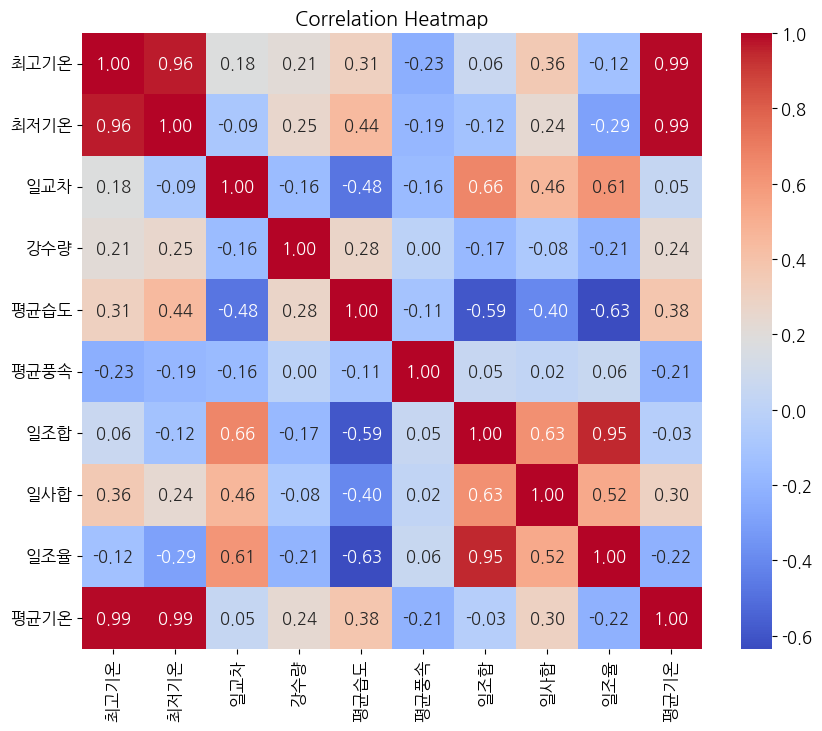

In [9]:
import seaborn as sns

correlation_matrix = train_df.corr()

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

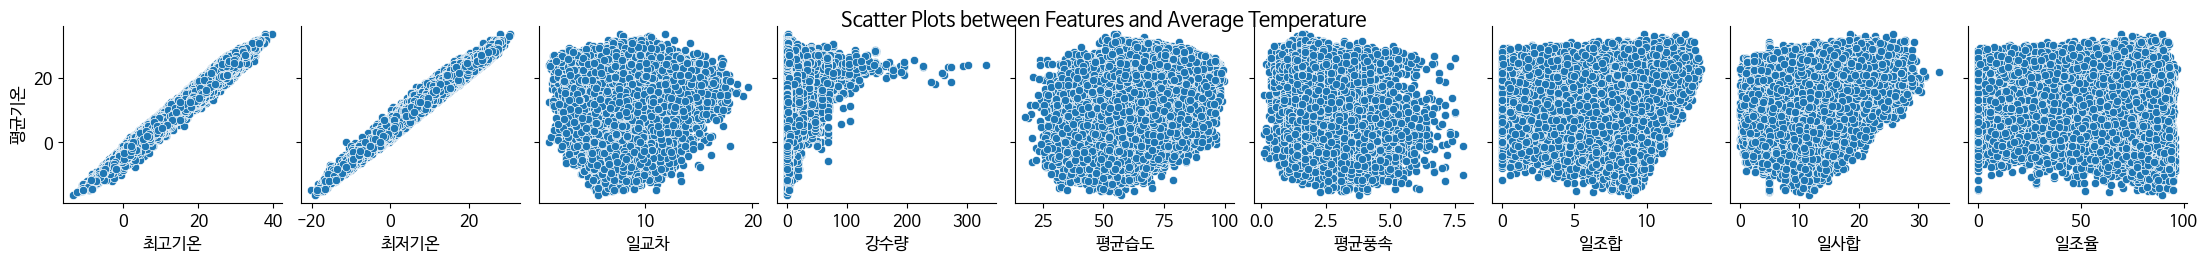

In [10]:
plt.rc('font', family='NanumBarunGothic')
# 설명변수와 예측변수 간의 산점도 행렬
sns.pairplot(train_df, x_vars=['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율'], y_vars=['평균기온'])
plt.suptitle('Scatter Plots between Features and Average Temperature', y=1.02)
plt.show()

In [11]:
train_df = train_df.drop(['일조합', '일교차'], axis=1)
train_df.head()

,일시,최고기온,최저기온,강수량,평균습도,평균풍속,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,0.4,68.3,1.7,4.81,28.1,-1.6
1,1960-01-02,1.2,-5.6,0.4,87.7,1.3,4.81,28.1,-1.9
2,1960-01-03,8.7,-2.1,0.0,81.3,3.0,4.81,28.1,4.0
3,1960-01-04,10.8,1.2,0.0,79.7,4.4,4.81,28.1,7.5
4,1960-01-05,1.3,-8.2,0.0,44.0,5.1,4.81,28.1,-4.6


In [13]:
# train_test_split으로 임의로 잘라서 학습
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['일시', '평균기온'],axis=1), train_df['평균기온'], test_size=0.2, random_state=42)
rf= RandomForestRegressor(random_state=0,max_depth=10,n_estimators=500)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
mean_absolute_error(y_test,pred)

0.38987628545371716

In [14]:
# 수동으로 sequence 순서에 맞춰서 잘라서 학습
n = len(train_df)
train= train_df[0:int(n*0.8)]
test = train_df[int(n*0.8):]

X_train = train.drop(['일시', '평균기온'],axis=1)
X_test = test.drop(['일시', '평균기온'],axis=1)
y_train = train['평균기온']
y_test = test['평균기온']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18408, 7), (4603, 7), (18408,), (4603,))

In [15]:
X_train.tail()

,최고기온,최저기온,강수량,평균습도,평균풍속,일사합,일조율
18403,28.6,14.9,5.5,49.8,1.8,24.92,70.6
18404,25.5,15.7,5.5,61.1,1.8,7.87,0.7
18405,18.1,14.6,21.5,78.0,4.7,3.50,0.0
18406,15.8,12.2,15.5,93.1,3.2,4.98,0.0
18407,18.8,12.1,0.5,85.6,1.7,6.31,6.3


In [16]:
X_test.head()

,최고기온,최저기온,강수량,평균습도,평균풍속,일사합,일조율
18408,21.7,14.0,0.5,60.8,2.8,21.65,44.1
18409,24.0,11.5,1.5,53.0,2.5,26.66,78.6
18410,20.4,14.5,1.5,66.4,1.9,12.68,0.0
18411,23.3,14.6,1.5,63.1,1.7,15.34,18.6
18412,23.4,15.0,1.5,59.4,2.2,20.45,42.1


In [17]:
rf= RandomForestRegressor(random_state=0,max_depth=10,n_estimators=500)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
mean_absolute_error(y_test,pred)

0.3920190135917532